In [20]:
# Importing all needed packages
# Standard packages for data visualization
import numpy as np
import scipy as sp 
import matplotlib.pyplot as plt   
%matplotlib notebook

# Packages for reading astronomical data stored in fits files and accessing file paths
from astropy.io import fits  # to read fits files with python
import glob  # to find pathnames

# Packages for importing ad-hoc modules 
import importlib
import sys
#importlib.reload(sys.modules['data_reduction']) # uncomment when you edit the module data_reduction.py
from data_reduction import *

# Other
import datetime
import timeit
from regions import PixCoord
from regions import RectanglePixelRegion

In [21]:
path2data = 'C:\\Users\\jeeth\\OneDrive\\Documents\\winnie\\data_iraf_a1\\calibrationFiles'
# List of filenames 
bias_files = glob.glob(path2data+'/bias*.fits', recursive=True) 
flat_files = glob.glob(path2data+'/*g*_b.fits', recursive=True) 
print(bias_files)
print(flat_files)

['C:\\Users\\jeeth\\OneDrive\\Documents\\winnie\\data_iraf_a1\\calibrationFiles\\bias01.fits', 'C:\\Users\\jeeth\\OneDrive\\Documents\\winnie\\data_iraf_a1\\calibrationFiles\\bias02.fits', 'C:\\Users\\jeeth\\OneDrive\\Documents\\winnie\\data_iraf_a1\\calibrationFiles\\bias03.fits', 'C:\\Users\\jeeth\\OneDrive\\Documents\\winnie\\data_iraf_a1\\calibrationFiles\\bias04.fits', 'C:\\Users\\jeeth\\OneDrive\\Documents\\winnie\\data_iraf_a1\\calibrationFiles\\bias05.fits', 'C:\\Users\\jeeth\\OneDrive\\Documents\\winnie\\data_iraf_a1\\calibrationFiles\\bias06.fits', 'C:\\Users\\jeeth\\OneDrive\\Documents\\winnie\\data_iraf_a1\\calibrationFiles\\bias07.fits', 'C:\\Users\\jeeth\\OneDrive\\Documents\\winnie\\data_iraf_a1\\calibrationFiles\\bias08.fits']
['C:\\Users\\jeeth\\OneDrive\\Documents\\winnie\\data_iraf_a1\\calibrationFiles\\flat_g01_b.fits', 'C:\\Users\\jeeth\\OneDrive\\Documents\\winnie\\data_iraf_a1\\calibrationFiles\\flat_g02_b.fits', 'C:\\Users\\jeeth\\OneDrive\\Documents\\winnie\\da

In [22]:
import os
from astropy.io import fits
import matplotlib.pyplot as plt

# Function to display a FITS file
def display_fits(filename, title):
    with fits.open(filename) as hdul:
        data = hdul[0].data
        plt.figure(figsize=(8, 6))
        plt.imshow(data, cmap='gray')  # Assuming flats are grayscale
        plt.colorbar(label='Pixel Value')
        plt.title(title)
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        plt.show()

In [23]:
# Step 3: Calculate statistics for bias frames
def calculate_stats(files):
    stats = []
    for file in files:
        with fits.open(file) as hdul:
            data = hdul[0].data
            mean = np.mean(data)
            stddev = np.std(data)
            stats.append((file, mean, stddev))
    return stats

bias_stats = calculate_stats(bias_files)
print(bias_stats)

[('C:\\Users\\jeeth\\OneDrive\\Documents\\winnie\\data_iraf_a1\\calibrationFiles\\bias01.fits', 1768.5173483521069, 49.40136029580966), ('C:\\Users\\jeeth\\OneDrive\\Documents\\winnie\\data_iraf_a1\\calibrationFiles\\bias02.fits', 1767.9619165623697, 49.641569693151794), ('C:\\Users\\jeeth\\OneDrive\\Documents\\winnie\\data_iraf_a1\\calibrationFiles\\bias03.fits', 1768.3330921985817, 49.98948616142815), ('C:\\Users\\jeeth\\OneDrive\\Documents\\winnie\\data_iraf_a1\\calibrationFiles\\bias04.fits', 1768.4463400083437, 50.862351000596114), ('C:\\Users\\jeeth\\OneDrive\\Documents\\winnie\\data_iraf_a1\\calibrationFiles\\bias05.fits', 1768.6181914893616, 51.468189258336636), ('C:\\Users\\jeeth\\OneDrive\\Documents\\winnie\\data_iraf_a1\\calibrationFiles\\bias06.fits', 1769.132744263663, 52.14899601832152), ('C:\\Users\\jeeth\\OneDrive\\Documents\\winnie\\data_iraf_a1\\calibrationFiles\\bias07.fits', 1769.475937004589, 52.677916976983795), ('C:\\Users\\jeeth\\OneDrive\\Documents\\winnie\\dat

[[   4.    1769.    1214.625 ... 1979.125 1977.5   1983.25 ]
 [1980.    1971.375 1993.375 ... 1765.5   1766.375 1767.25 ]
 [1766.625 1767.375 1766.75  ... 1766.875 1766.875 1766.625]
 ...
 [1767.25  1766.875 1766.125 ... 1767.375 1767.25  1766.875]
 [1767.375 1768.125 1767.5   ... 1766.75  1767.125 1767.125]
 [1766.875 1768.625 1767.    ... 1766.625 1768.125 1766.875]]


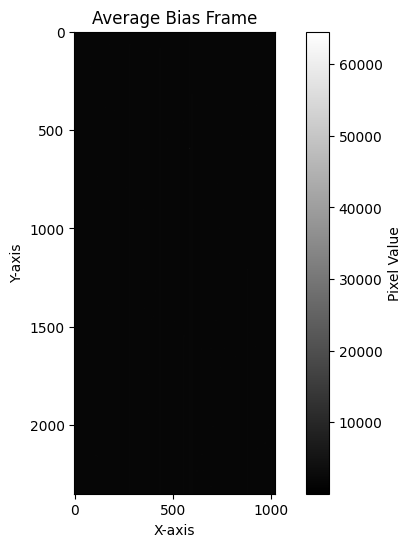

In [24]:
# Step 4: Build the average bias frame
def build_average_bias(bias_files):
    data_stack = []
    for file in bias_files:
        with fits.open(file) as hdul:
            data_stack.append(hdul[0].data)
    average_bias = np.mean(data_stack, axis=0)
    return average_bias

# Build the average bias frame
average_bias_data = build_average_bias(bias_files)
print(average_bias_data)

%matplotlib inline
# Visualize the average bias frame
plt.figure(figsize=(8, 6))
plt.imshow(average_bias_data, cmap='gray')  # Assuming bias frames are grayscale
plt.colorbar(label='Pixel Value')
plt.title('Average Bias Frame')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

In [25]:
output_filename = '../data_iraf_a1/calibrationFiles/average_bias.fits'  
hdu = fits.PrimaryHDU(average_bias_data)
hdul = fits.HDUList([hdu])
hdul.writeto(output_filename, overwrite=True)

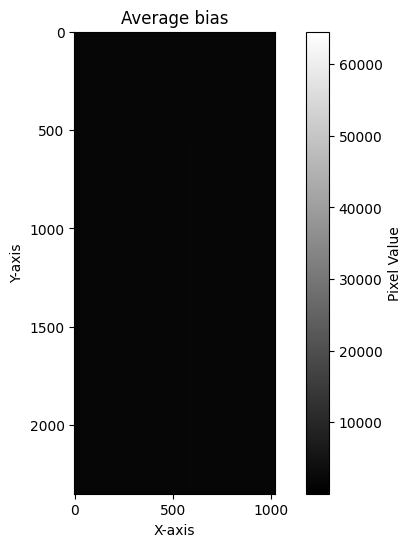

In [26]:
display_fits(output_filename, 'Average bias')

In [27]:
# Step 5: Subtract average bias frame from flat-field frames
def subtract_bias_from_flats(flat_files, average_bias_data):
    for file in flat_files:
        with fits.open(file) as hdul:
            data = hdul[0].data
            corrected_data = data - average_bias_data
            hdul[0].data = corrected_data
            hdul.writeto(file+'_corrected', overwrite=True)

subtract_bias_from_flats(flat_files, average_bias_data)

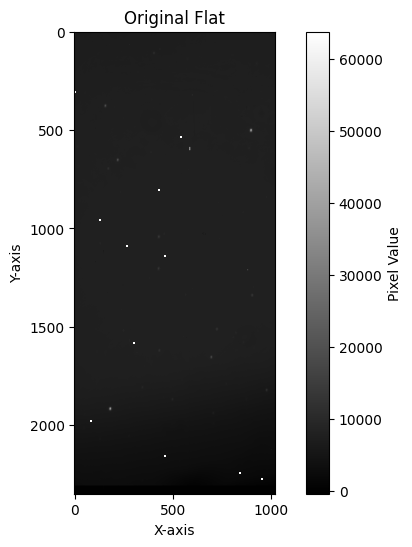

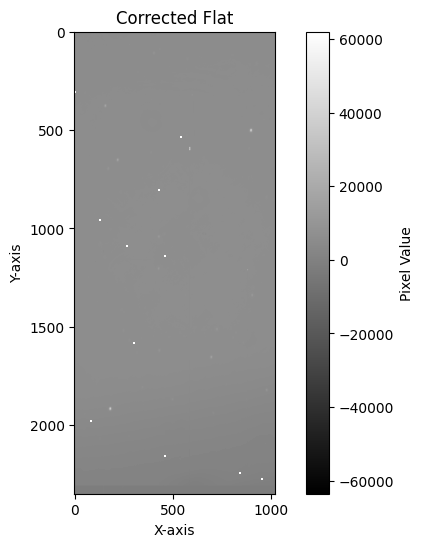

In [28]:
# Display original flat
display_fits(flat_files[0], 'Original Flat')

# Display corrected flat after subtracting average bias
science_filescience_file

In [30]:
# Step 6: Combine corrected flat fields using median method
def combine_flats_median(flat_files):
    flat_data = [fits.getdata(file) for file in flat_files]
    combined_flat = np.median(flat_data, axis=0)
    return combined_flat

final_flat_data = combine_flats_median(flat_files)

combined_flat_filename = '../data_iraf_a1/calibrationFiles/combined_flat.fits'
hdu_combined = fits.PrimaryHDU(final_flat_data)
hdul_combined = fits.HDUList([hdu_combined])
hdul_combined.writeto(combined_flat_filename, overwrite=True)


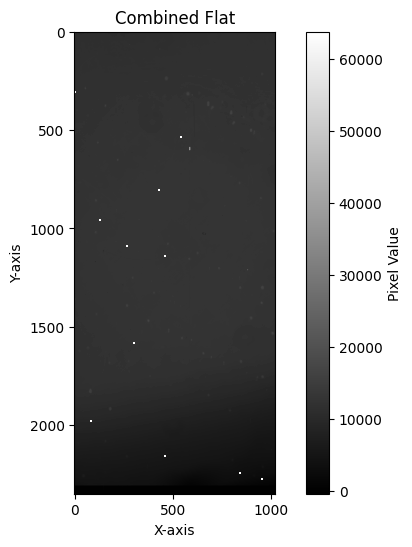

In [31]:
display_fits(combined_flat_filename, 'Combined Flat')

In [43]:
# Step 7: Normalize combined flat field
def normalize_flat(final_flat_data):
    mean = np.mean(final_flat_data)
    normalized_flat = final_flat_data / mean
    return normalized_flat

normalized_flat_data = normalize_flat(final_flat_data)

normalized_flat_filename = '../data_iraf_a1/calibrationFiles/normalized_flat.fits'  
hdu_combined = fits.PrimaryHDU(final_flat_data)
hdul_combined = fits.HDUList([hdu_combined])
hdul_combined.writeto(normalized_flat_filename, overwrite=True)


In [45]:
# Step 8: Subtract bias and divide by normalized flat for science frames

def calibrate_science(science_file, average_bias_data, normalized_flat_data):
    with fits.open(science_file) as hdul:
        data = hdul[0].data
        calibrated_data = (data - average_bias_data) / normalized_flat_data
        hdul[0].data = calibrated_data
        hdul.writeto(science_file+'_calibrated', overwrite=True)

science_file = '../data_iraf_a1/calibrationFiles/Wolf_g.fits'  
calibrate_science(science_file, average_bias_data, normalized_flat_data)

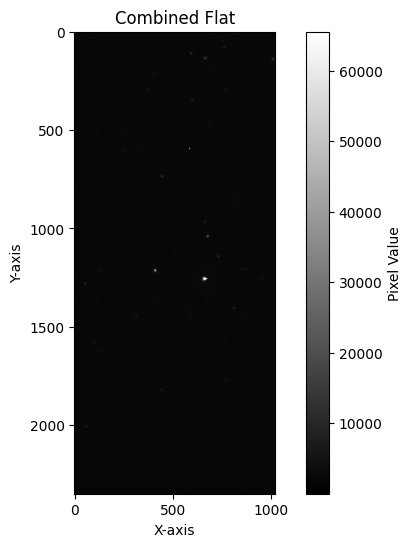

In [46]:
display_fits(science_file, 'science file')